# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Importing essential libraries for data handling and analysis
# For handling and inspecting data
import pandas as pd         
import numpy as np          
# For Building & Tuning Machine Learning Models
from sklearn.model_selection import train_test_split       
from sklearn.linear_model import LinearRegression          
from sklearn.preprocessing import StandardScaler           
from sklearn.feature_selection import RFE                  
# For Model Evaluation Techniques
from sklearn.metrics import (
    mean_absolute_error,     # Average absolute error between predictions and actuals
    mean_squared_error,      # Squared average error
    r2_score                 # R² – how well the model explains the target
)
# For Visualization Libraries
import matplotlib.pyplot as plt     
import seaborn as sns               

# Setting  visual theme and size
sns.set_theme(style="ticks")        
plt.rcParams['figure.figsize'] = (10, 6)  

import warnings
warnings.filterwarnings('ignore')



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")



In [9]:
#Understanding the structure of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [10]:
#Checking the data  structure of the dataset provided  
df.shape

(175777, 14)

In [11]:
#Looking for missing values in each column
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

In [12]:
 # displaying the column names 
df.columns.tolist()

['market_id',
 'created_at',
 'actual_delivery_time',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance']

In [13]:
# Displaying  the first few rows to examine structure
preview_data = df.head()
# Gathering  basic details to summarize the dataset
data_overview = {
    "Total Records & Features": df.shape,
    "Column Headers": df.columns.tolist(),
    "Target Column (to engineer)": "delivery_duration_minutes",
    "Initial Data Preview": preview_data
}
# Output the structured summary
data_overview

{'Total Records & Features': (175777, 14),
 'Column Headers': ['market_id',
  'created_at',
  'actual_delivery_time',
  'store_primary_category',
  'order_protocol',
  'total_items',
  'subtotal',
  'num_distinct_items',
  'min_item_price',
  'max_item_price',
  'total_onshift_dashers',
  'total_busy_dashers',
  'total_outstanding_orders',
  'distance'],
 'Target Column (to engineer)': 'delivery_duration_minutes',
 'Initial Data Preview':    market_id           created_at actual_delivery_time  \
 0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
 1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
 2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
 3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
 4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   
 
    store_primary_category  order_protocol  total_items  subtotal  \
 0                       4             1.0            4      3441   
 1                      46             2.0            1      190

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [17]:
# Converting date and time feild to appropriate data type

# Transforming the 'created_at' and 'actual_delivery_time' fields
# This  would enables time-based calculations like delivery duration
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

# Verifying Check if the conversion was successful
print("Column Data Types (Post-Conversion):")
print(df[["created_at", "actual_delivery_time"]].dtypes)


Column Data Types (Post-Conversion):
created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [19]:
# Convert categorical features to category type
# Identifying and converting  specific columns into categorical data type
# These fields are stored as numbers but represent distinct classes/groups

# Defining the list of columns that should be treated as categories
fields_to_convert = ['market_id', 'store_primary_category', 'order_protocol']

# Converting  each listed field into 'category' format for memory and analysis efficiency
for feature in fields_to_convert:
    df[feature] = df[feature].astype("category")

# Verifying  the result to ensure data types were updated
print("Updated Types for Categorical Features:")
print(df[fields_to_convert].dtypes)



Updated Types for Categorical Features:
market_id                 category
store_primary_category    category
order_protocol            category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [22]:
# Calculating the  time taken in minutes
#Calculating  delivery duration
# Computing the difference between actual delivery time and order creation time
# This would become our main target variable for regression
df["delivery_duration_minutes"] = (
    df["actual_delivery_time"] - df["created_at"]
).dt.total_seconds() / 60

#Verifying the  created feature along with its components
print("Duration Calculation:")
df[["created_at", "actual_delivery_time", "delivery_duration_minutes"]].head()


Duration Calculation:


created_at actual_delivery_time  delivery_duration_minutes
0 2015-02-06 22:24:17  2015-02-06 23:11:17                       47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25                       44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35                       55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46                       59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36                       46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [24]:
# Extract the hour and day of week from the 'created_at' timestamp
#figuring out what time the order was placed during the day
# This can help us learn if certain hours tend to have longer delivery times
#  Extracting  the hour and day of week from the 'created_at' timestamp
# Extracting  the hour to analyze time-of-day impact on delivery duration
df["order_hour"] = df["created_at"].dt.hour
# Extracting  the day of the week (0 = Monday, 6 = Sunday)
df["order_dayofweek"] = df["created_at"].dt.dayofweek
# Previewing the extracted time-based features
print(" Order timing snapshot:")
print(df[["created_at", "order_hour", "order_dayofweek"]].head())
#  Creating 'isWeekend' Flag Based on Day of Week
# Define weekends as Saturday (5) and Sunday (6)
df["isWeekend"] = df["order_dayofweek"].apply(lambda x: 1 if x >= 5 else 0)

# Final check: Ensure the weekend flag mapping is correct
print(" Distinct day/weekend mappings:")
print(df[["order_dayofweek", "isWeekend"]].drop_duplicates().sort_values("order_dayofweek"))





 Order timing snapshot:
           created_at  order_hour  order_dayofweek
0 2015-02-06 22:24:17          22                4
1 2015-02-10 21:49:25          21                1
2 2015-02-16 00:11:35           0                0
3 2015-02-12 03:36:46           3                3
4 2015-01-27 02:12:36           2                1
 Distinct day/weekend mappings:
    order_dayofweek  isWeekend
2                 0          0
1                 1          0
27                2          0
3                 3          0
0                 4          0
7                 5          1
6                 6          1


In [25]:
# Removing Unnecessary Datetime Columns After Feature Extraction
# Define the raw datetime fields that are no longer needed
datetime_columns_to_remove = ['created_at', 'actual_delivery_time']
# Dropping those columns only if they are still present to avoid re-run errors
df.drop(columns=[col for col in datetime_columns_to_remove if col in df.columns], inplace=True)
# Printing confirmation of remaining columns after removal
print(" Columns left after dropping raw datetime fields:")
print(df.columns.tolist())
# Dropping Rare or Irrelevant market_id Categories
# Checking how frequently each market_id appears
market_id_counts = df['market_id'].value_counts()
print("\n market_id value counts:")
print(market_id_counts)

# Define rare market_ids as those appearing less than 100 times
rare_market_ids = market_id_counts[market_id_counts < 100].index.tolist()

# Drop rows with rare market_ids from the dataset
df = df[~df['market_id'].isin(rare_market_ids)]

# Confirm new shape of the dataset after cleaning
print(" Dataset shape after removing rare market_ids:", df.shape)



 Columns left after dropping raw datetime fields:
['market_id', 'store_primary_category', 'order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_duration_minutes', 'order_hour', 'order_dayofweek', 'isWeekend']

 market_id value counts:
market_id
2.0    53469
4.0    46222
1.0    37115
3.0    21075
5.0    17258
6.0      638
Name: count, dtype: int64
 Dataset shape after removing rare market_ids: (175777, 16)


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [28]:
# Define target variable (Y) and features (X)
# Setting up the variable  to predict — the delivery time in minutes 
# We shall denote with  'Y' and pull it from the 'delivery_duration_minutes' column
Y = df["delivery_duration_minutes"]

# Selecting all remaining columns as input features (X)
# Exclude the target variable to prevent data leakage during model training
X = df.drop(columns=["delivery_duration_minutes"])

# Confirming both Target and Features 
print(f" X shape (features): {X.shape}")  # Should show rows x number of features
print(f" Y shape (target): {Y.shape}")    # Should match the number of rows



 X shape (features): (175777, 15)
 Y shape (target): (175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [30]:
# Split data into training and testing sets

# Splitting  the dataset into training and test sets for model development and evaluation.
# A standard 80/20 split is used — 80% for training the model, 20% for validation.
from sklearn.model_selection import train_test_split

# Using  a fixed random_state to make sure they are consistent results across multiple runs
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
# Displaying  the shapes of the resulting subsets to confirm successful splitting
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape:   {Y_train.shape}")
print(f"Test features shape:     {X_test.shape}")
print(f"Test target shape:       {Y_test.shape}")



Training features shape: (140621, 15)
Training target shape:   (140621,)
Test features shape:     (35156, 15)
Test target shape:       (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [33]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Identifying  which features are numeric and which are categorical
# This would  helps us to  decide which types of plots and summary statistics to apply during EDA.

# Extracting  numeric feature columns  which  includes both integers and floats
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Extracting  categorical feature columns which was  previously converted to 'category' dtype
categorical_features = X_train.select_dtypes(include='category').columns.tolist()

#  Confirming  each type
print(" Numeric Features Detected:", numeric_features)
print(" Categorical Features Detected:", categorical_features)




 Numeric Features Detected: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']
 Categorical Features Detected: ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

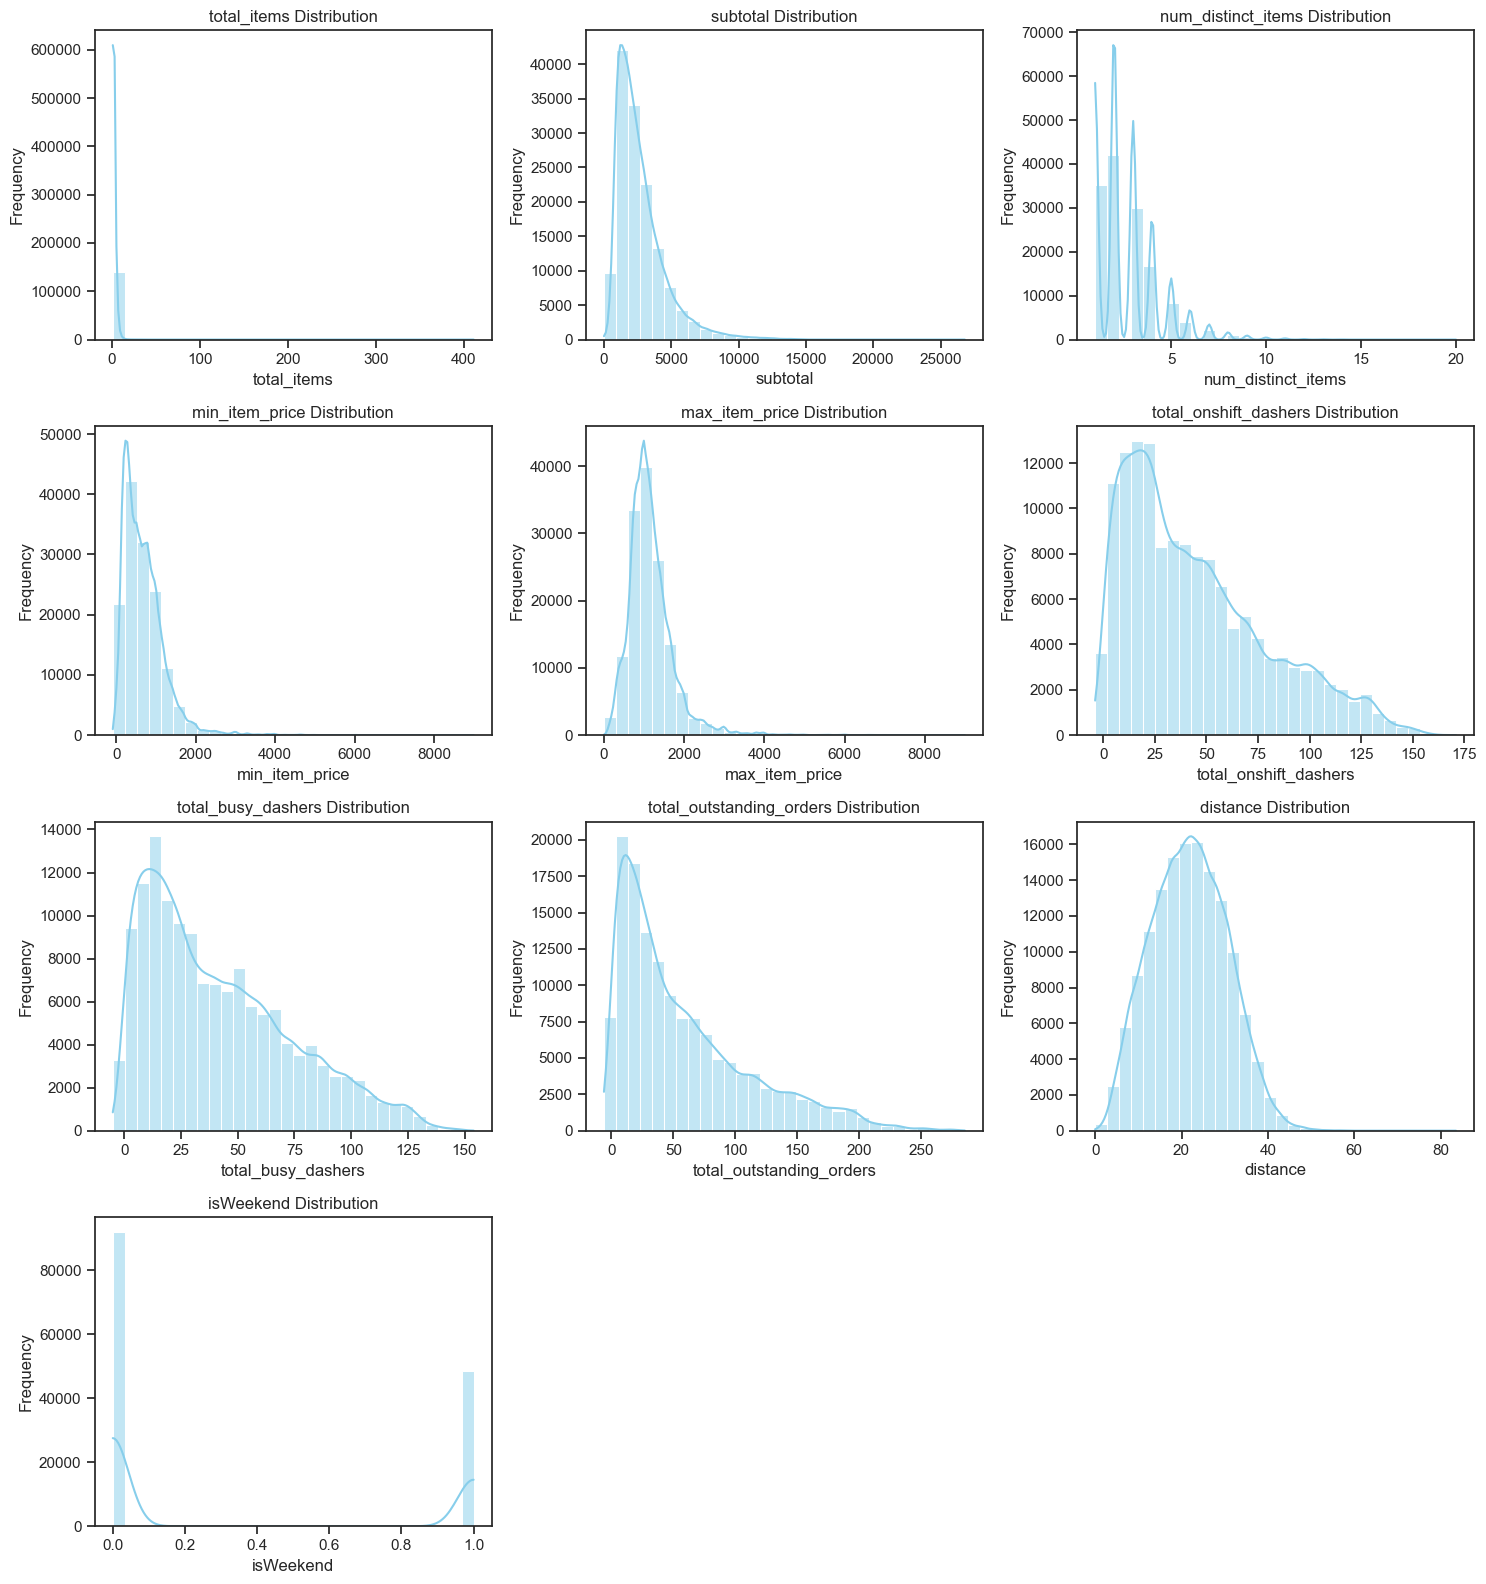

In [35]:
# Plotting  distributions for all numerical columns

total_numeric = len(numeric_features)
columns_per_row = 3
rows_needed = (total_numeric + columns_per_row - 1) // columns_per_row  # Ceiling division
plt.figure(figsize=(15, 4 * rows_needed))
for idx, column in enumerate(numeric_features, start=1):
    plt.subplot(rows_needed, columns_per_row, idx)
    sns.histplot(X_train[column], bins=30, kde=True, color='skyblue')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

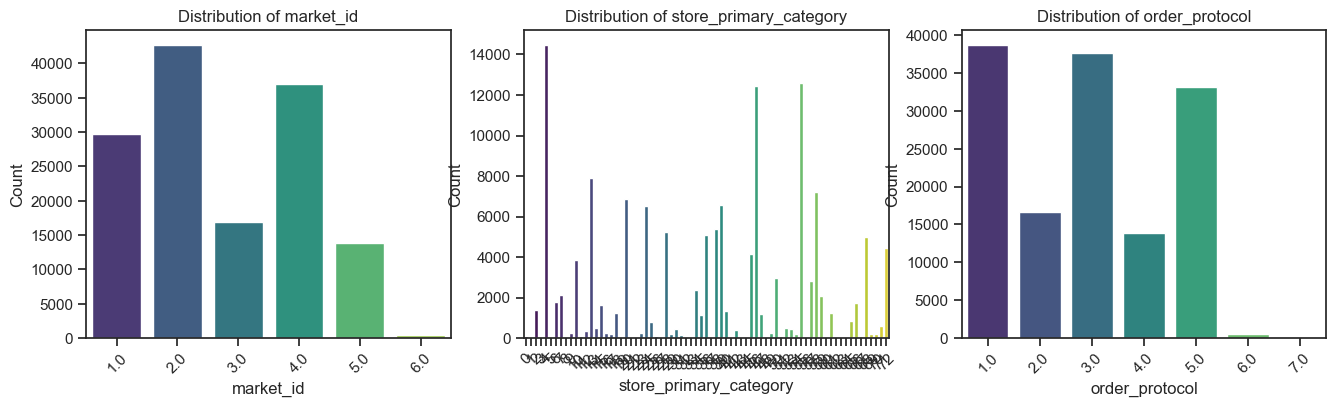

In [37]:
# Distribution of categorical columns
n_cat = len(categorical_features)
cols = 3
rows = (n_cat + cols - 1) // cols  

plt.figure(figsize=(16, 4 * rows))
# Looping  through each categorical feature to plot its distribution
for i, cat_col in enumerate(categorical_features, start=1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=X_train, x=cat_col, palette="viridis")
    plt.title(f"Distribution of {cat_col}")
    plt.xticks(rotation=45)
    plt.xlabel(cat_col)
    plt.ylabel("Count")



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

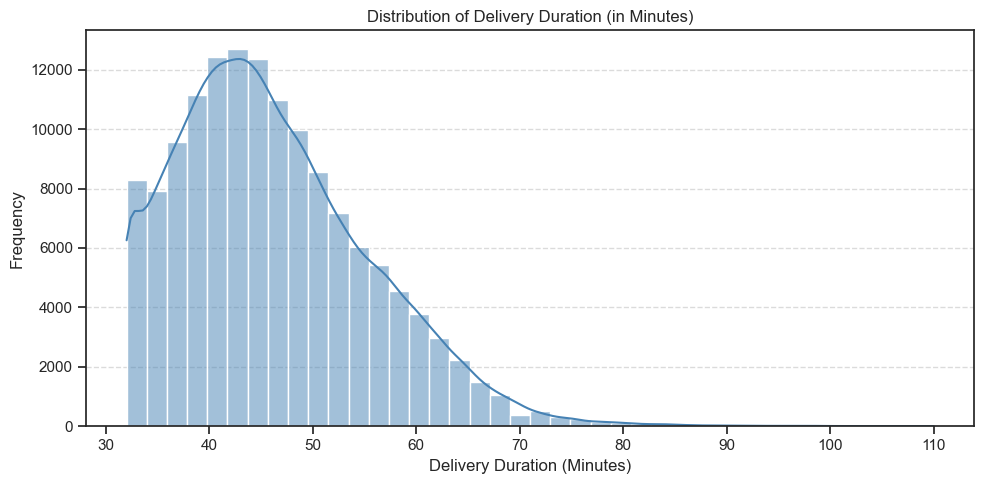

In [39]:
# Visualizing  the  target variable (delivery_duration_minutes) is distributed.
# This helps assess its spread, skewness, and any potential outliers.
plt.figure(figsize=(10, 5))

# Use seaborn to plot histogram with KDE overlay
sns.histplot(Y_train, bins=40, kde=True, color="steelblue")

# Add plot labels and styling
plt.title("Distribution of Delivery Duration (in Minutes)")
plt.xlabel("Delivery Duration (Minutes)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

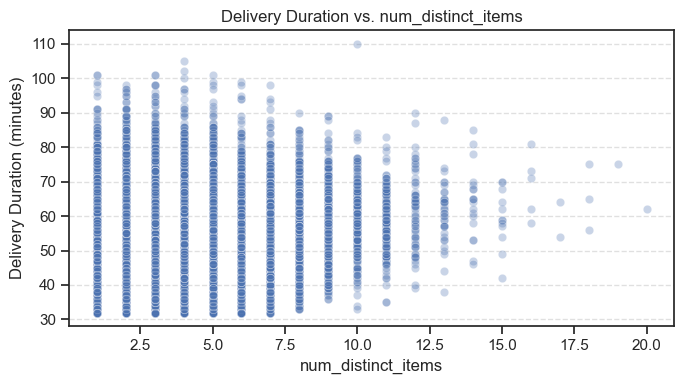

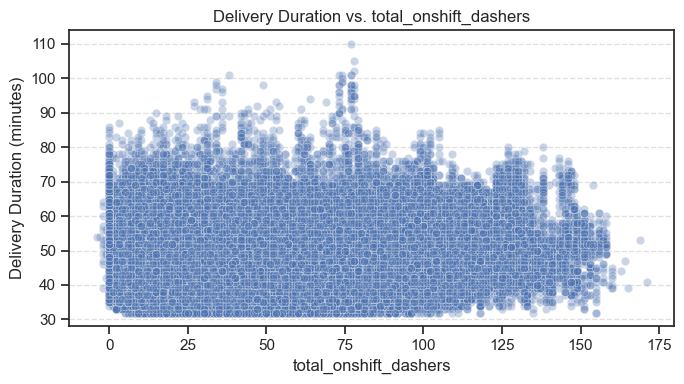

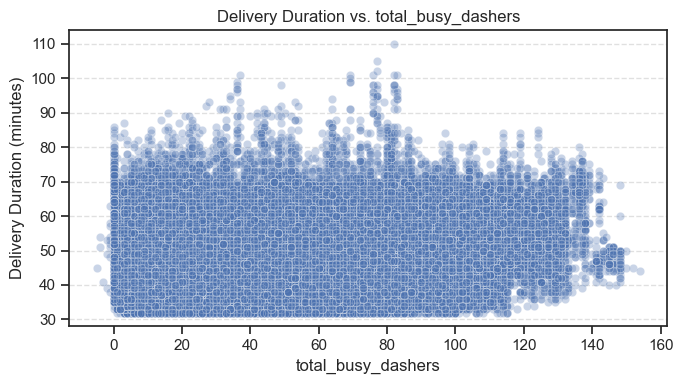

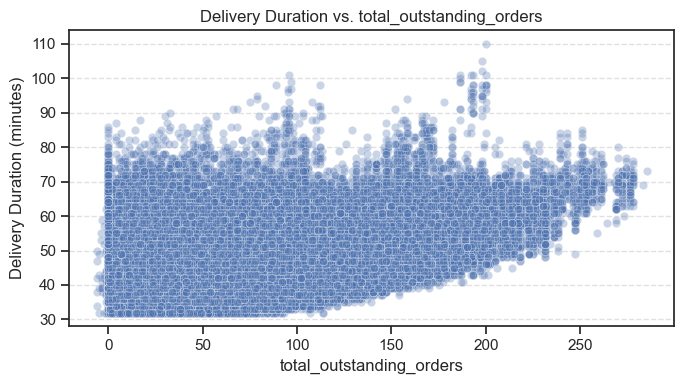

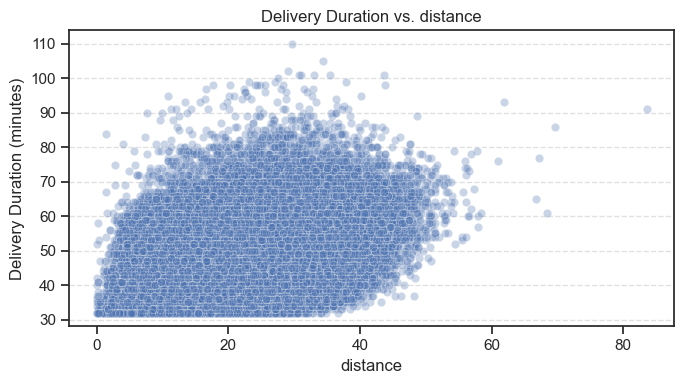

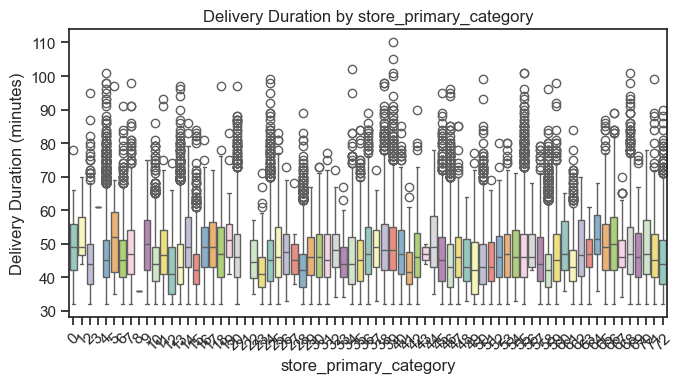

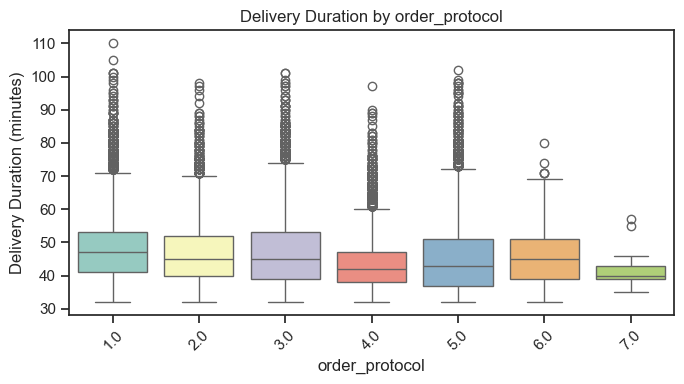

In [42]:
# Scatter plot to visualise the relationship between time_taken and other features
# Combining feature set (X_train) and target (Y_train) into one DataFrame
# This simplifies visualization and ensures alignment by index
train_combined = X_train.copy()
train_combined["delivery_duration_minutes"] = Y_train

# For numerical features, we'll use scatter plots to observe any linear patterns with delivery time

for feature in numeric_features:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=train_combined, x=feature, y="delivery_duration_minutes", alpha=0.3)
    plt.title(f"Delivery Duration vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("Delivery Duration (minutes)")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# For categorical features, box plots are ideal  to compare median and IQR of delivery time per category

for feature in categorical_features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=train_combined, x=feature, y="delivery_duration_minutes", palette="Set3")
    plt.title(f"Delivery Duration by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Delivery Duration (minutes)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


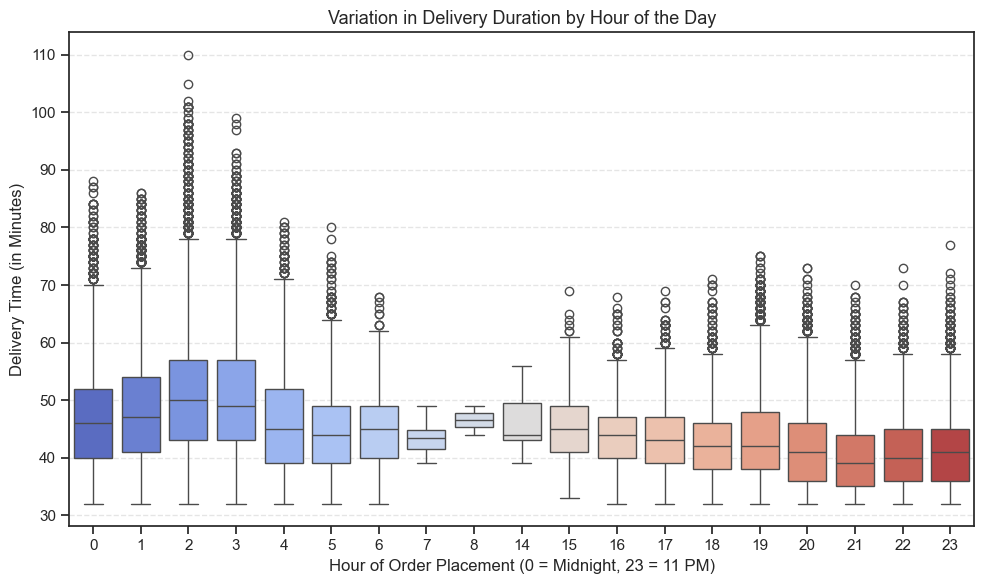

In [43]:
# Visualizing how delivery duration fluctuates by time of day
# by comparing delivery durations across all 24 hours of the day.

plt.figure(figsize=(10, 6))

# Creating a box plot to summarize delivery time trends across hours
# X-axis: Hour the order was placed (0 = midnight, 23 = 11 PM)
# Y-axis: Delivery duration in minutes
# 'coolwarm' palette helps highlight differences visually
sns.boxplot(
    data=train_combined,
    x='order_hour',
    y='delivery_duration_minutes',
    palette='coolwarm'
)

# Adding clear chart labels and stylistic formatting
plt.title("Variation in Delivery Duration by Hour of the Day", fontsize=13)
plt.xlabel("Hour of Order Placement (0 = Midnight, 23 = 11 PM)")
plt.ylabel("Delivery Time (in Minutes)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

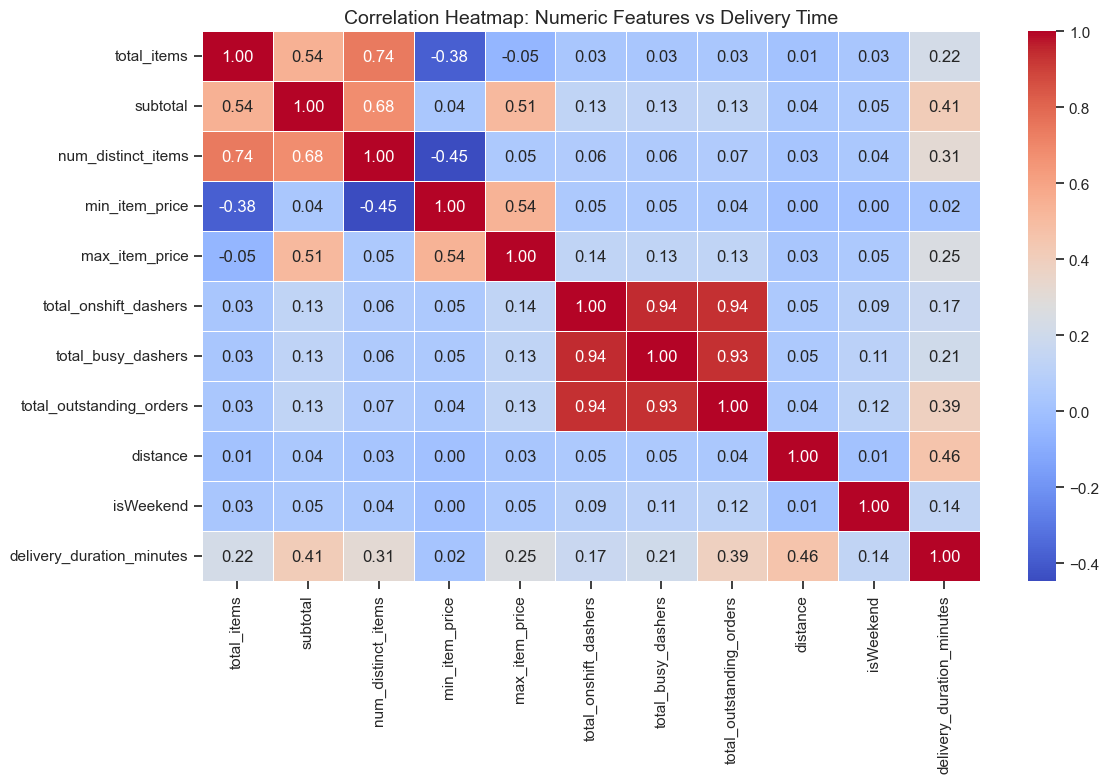

In [46]:
# -------------------------------------------------------------
# Generating  a correlation matrix to examine how numeric features
# between all numeric features and the target variable.
# This helps in identifying strong predictors and any
# potential multicollinearity among input variables.
# -------------------------------------------------------------

# Computing  correlation matrix for numeric features including the target
correlation_matrix = train_combined[numeric_features + ["delivery_duration_minutes"]].corr()

# Plotting the heatmap to visualize correlation coefficients
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,               # Show numerical values inside heatmap cells
    fmt=".2f",                # Format float values to 2 decimal places
    cmap="coolwarm",          # Color theme for highlighting positive/negative correlations
    linewidths=0.5            
)

# Adding titles and layout adjustments
plt.title("Correlation Heatmap: Numeric Features vs Delivery Time", fontsize=14)
plt.tight_layout()
plt.show()




##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [48]:
# ----------------------------------------------------------
# Dropping features that have very low correlation with the target
# This would  helps us  simplify the model by removing noise and redundancy
# Threshold of 0.05 for absolute shall is for  correlation strength
# ----------------------------------------------------------

#  Isolating correlations between each numerical feature and the target variable
correlation_with_target = correlation_matrix["delivery_duration_minutes"].drop("delivery_duration_minutes")

# Identifying  features with low absolute correlation to the target
low_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.05].index.tolist()

# Checking  which features needs to be  removed
print("Features with weak correlation to target:", low_correlation_features)

# Dropping  weak features from both training and test datasets
X_train.drop(columns=low_correlation_features, inplace=True)
X_test.drop(columns=low_correlation_features, inplace=True)

# Confirming and  updateding  shape of feature matrices
print(f"Updated training feature shape: {X_train.shape}")
print(f"Updated test feature shape: {X_test.shape}")



Features with weak correlation to target: ['min_item_price']
Updated training feature shape: (140621, 14)
Updated test feature shape: (35156, 14)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

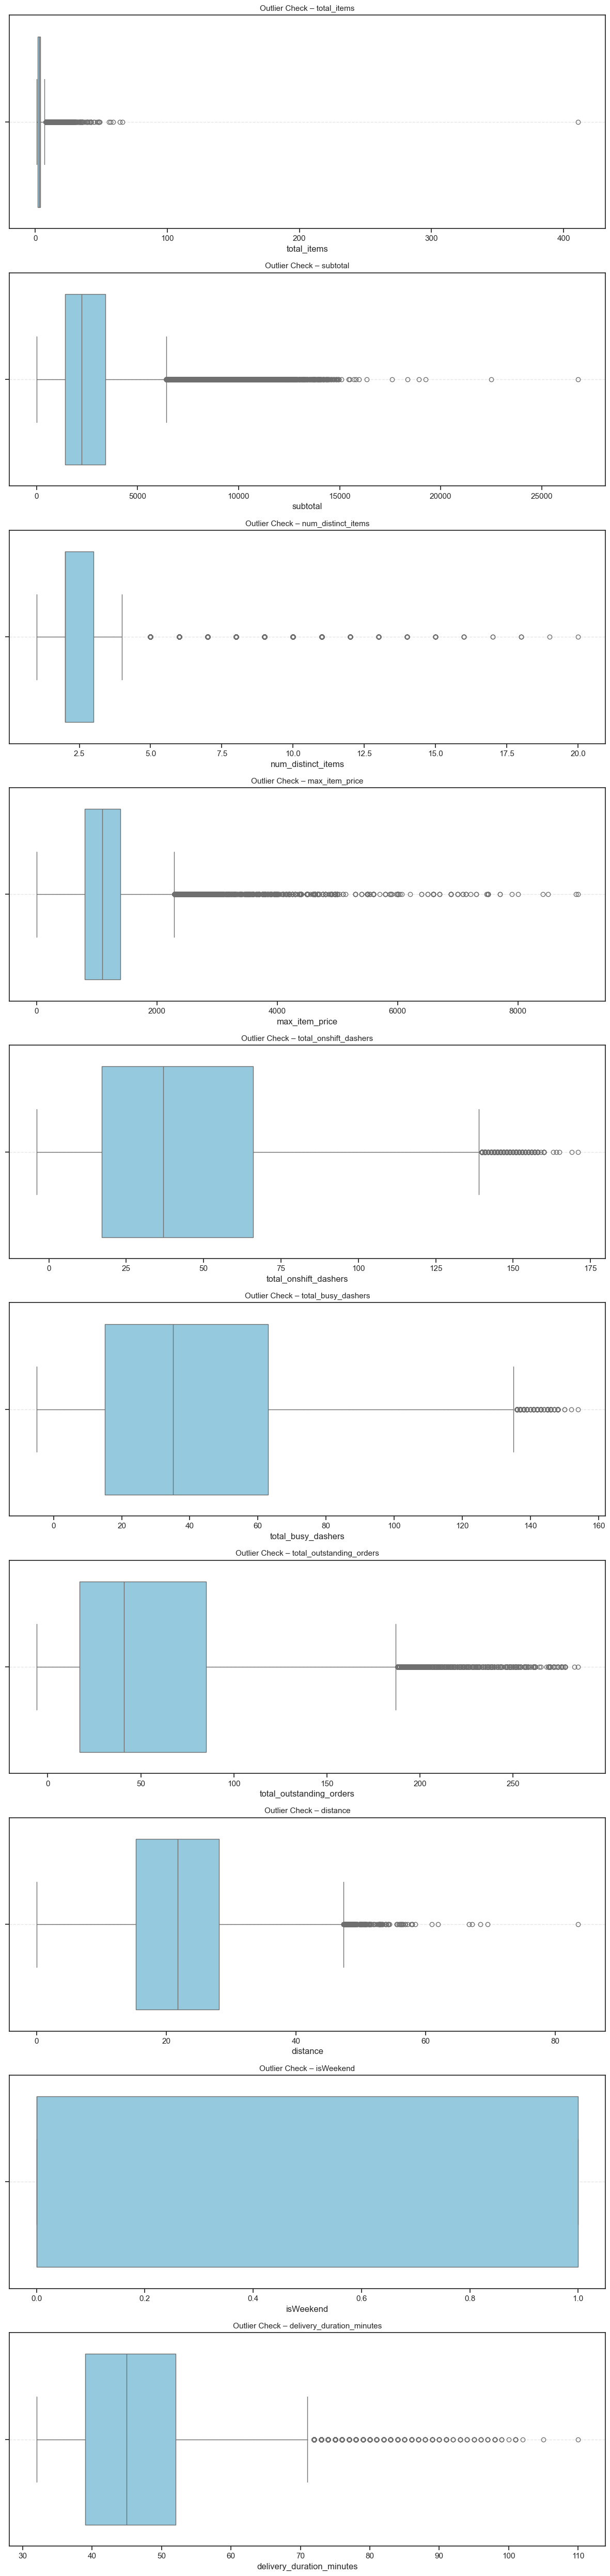

In [51]:
# ------------------------------------------------------------------------
# Outlier Detection: Using horizontal boxplots to inspect numeric features
# Each plot shows value spread, highlighting extreme (outlier) values
# ------------------------------------------------------------------------

# Cleaning column names to avoid issues like spaces or special chars
train_with_target = X_train.copy()
train_with_target["delivery_duration_minutes"] = Y_train
train_with_target.columns = train_with_target.columns.str.strip().str.replace(" ", "_")

# Selecting only numeric columns (including the target) for plotting
features_for_outlier_plot = [
    col for col in train_with_target.columns
    if train_with_target[col].dtype in ['int64', 'float64']
]

#  Setting up subplot layout for horizontal boxplots
n_cols = 1
n_rows = len(features_for_outlier_plot)

plt.figure(figsize=(12, 5 * n_rows))

for i, feature in enumerate(features_for_outlier_plot, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(
        data=train_with_target,
        x=feature,
        color="skyblue",
        orient="h"  
    )
    plt.title(f"Outlier Check – {feature}", fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [53]:
# Outlier Handling via IQR Capping (Interquartile Range Method)
# This method ensures extreme values are limited without removing data points,
# preserving dataset size and structure for modeling.

def apply_outlier_capping(data, column):
    """
    Apply IQR-based capping to limit outlier influence in a column.
    - Values above Q3 + 1.5*IQR are capped at the upper threshold.
    - Values below Q1 - 1.5*IQR are capped at the lower threshold.
    """
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
# Replacing  values outside limits with cap values
    data[column] = np.where(data[column] > upper_limit, upper_limit,
                    np.where(data[column] < lower_limit, lower_limit, data[column]))
    return data

# Identify all numeric features for capping
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply capping to each numeric feature in train and test sets
for column in numeric_columns:
    X_train = apply_outlier_capping(X_train, column)
    X_test = apply_outlier_capping(X_test, column)

# Also cap outliers in the target variable for both splits
Y_train = apply_outlier_capping(pd.DataFrame({'delivery_duration_minutes': Y_train}), 'delivery_duration_minutes')['delivery_duration_minutes']
Y_test = apply_outlier_capping(pd.DataFrame({'delivery_duration_minutes': Y_test}), 'delivery_duration_minutes')['delivery_duration_minutes']

print(" Outlier capping complete for all numeric features and the target variable.")



 Outlier capping complete for all numeric features and the target variable.


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [55]:
# Identifying  and label feature types in the validation (test) set
# This separation streamlines EDA, preprocessing, and model input handling.
# Finding  all numeric columns (integer and float types) in X_test
test_numeric_columns = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Finding  all categorical columns (category dtype) in X_test
test_categorical_columns = X_test.select_dtypes(include='category').columns.tolist()
# Displaying  the lists for verification and reporting
print("Numeric Features in Validation Set:", test_numeric_columns)
print("Categorical Features in Validation Set:", test_categorical_columns)



Numeric Features in Validation Set: ['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']
Categorical Features in Validation Set: ['market_id', 'store_primary_category', 'order_protocol']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

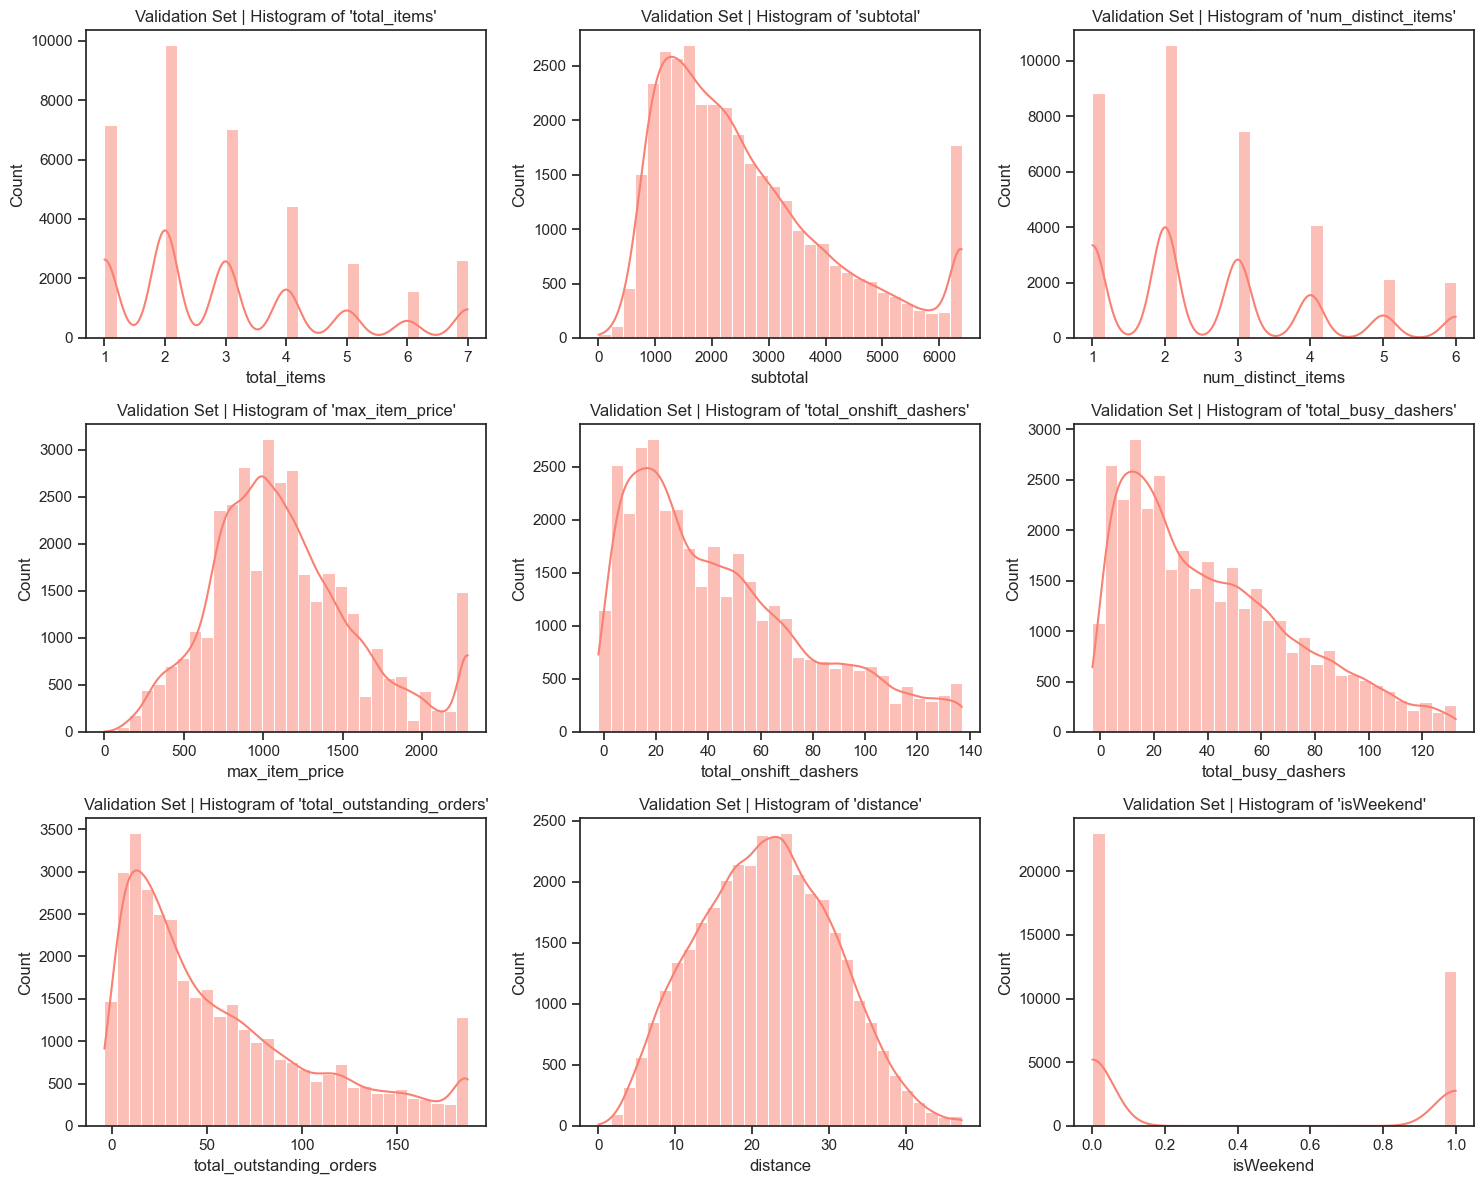

In [58]:
# Visualizing Distributions of Numeric Features in Validation Set
# This step helps confirm that feature patterns and ranges in X_test
# aligning  with training data, which is essential for fair model evaluation.

# Determining  the number of numeric features and calculate subplot layout
total_test_numeric = len(test_numeric_columns)
columns_in_row = 3
rows_needed = (total_test_numeric + columns_in_row - 1) // columns_in_row

# Setting  up the overall figure size based on the number of subplots
plt.figure(figsize=(15, 4 * rows_needed))

# Creating  a histogram for each numeric feature in the validation set
for index, column in enumerate(test_numeric_columns, start=1):
    plt.subplot(rows_needed, columns_in_row, index)
    sns.histplot(data=X_test[column], bins=30, kde=True, color='salmon')
    plt.title(f"Validation Set | Histogram of '{column}'")
    plt.xlabel(column)
    plt.ylabel("Count")

# Arranging  plots neatly and display
plt.tight_layout()
plt.show()




##### **4.1.2**
Check the distribution of categorical features`

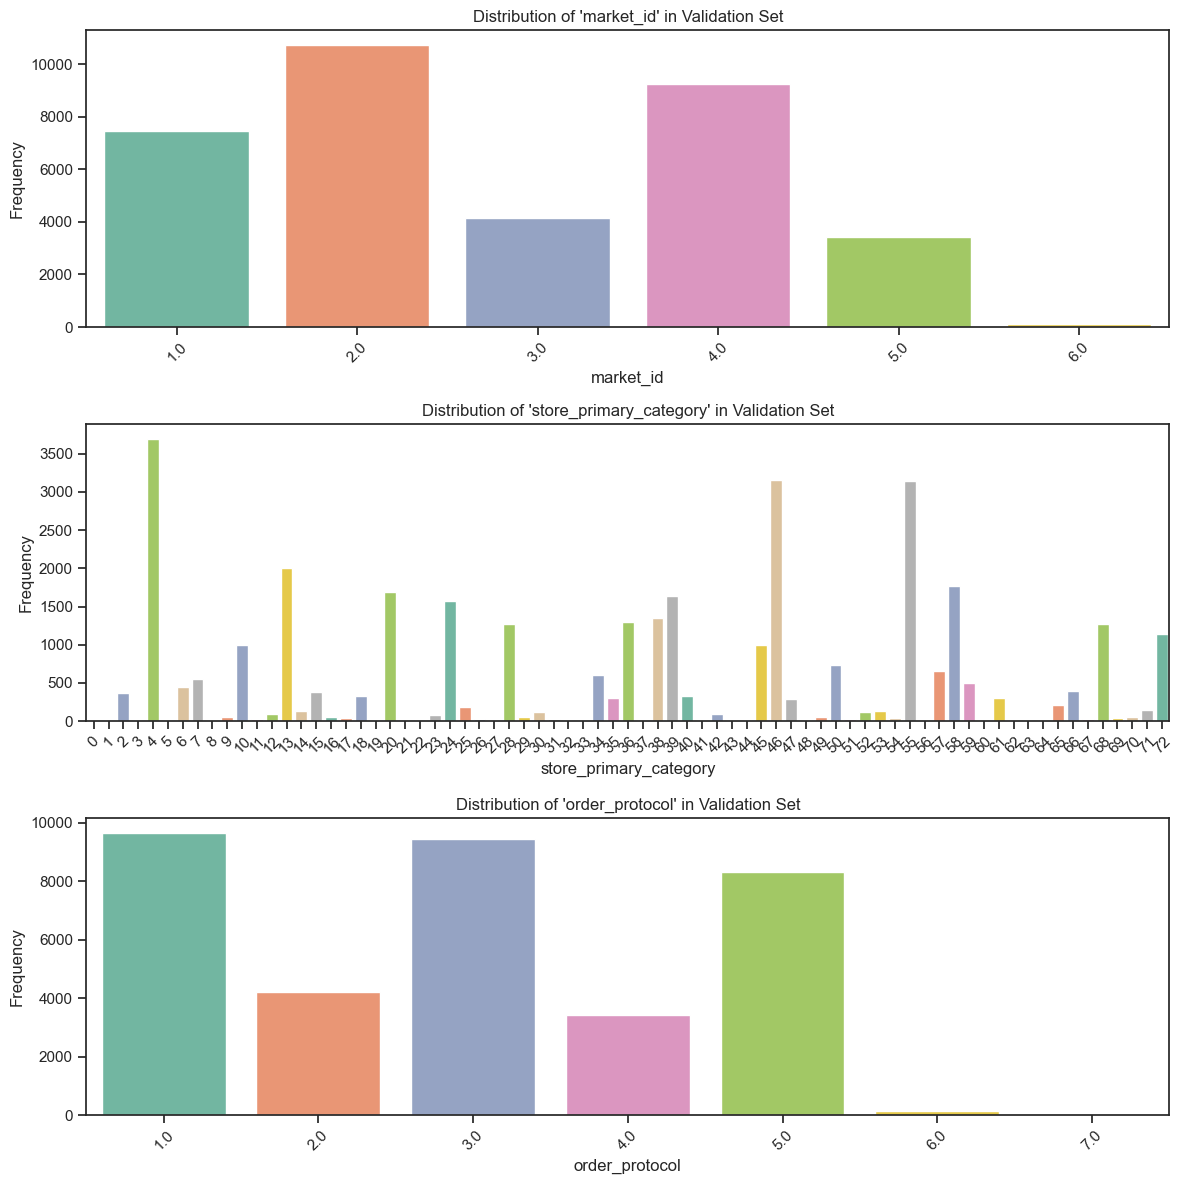

In [60]:
# Exploring the distribution of categorical features in the validation set
# This visualization checks whether category frequencies and group sizes
# are consistent with training data, which is crucial for unbiased model evaluation.
# Identifying all categorical columns in the test dataset
categorical_cols_test = X_test.select_dtypes(include='category').columns.tolist()
# Setting  up the plot size to ensure all categories are visible
plt.figure(figsize=(12, 4 * len(categorical_cols_test)))
# Generating a count plot for each categorical feature
for index, feature in enumerate(categorical_cols_test, start=1):
    plt.subplot(len(categorical_cols_test), 1, index)
    sns.countplot(data=X_test, x=feature, palette="Set2")
    plt.title(f"Distribution of '{feature}' in Validation Set")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)  # Improve readability for long category names

plt.tight_layout()
plt.show()




##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

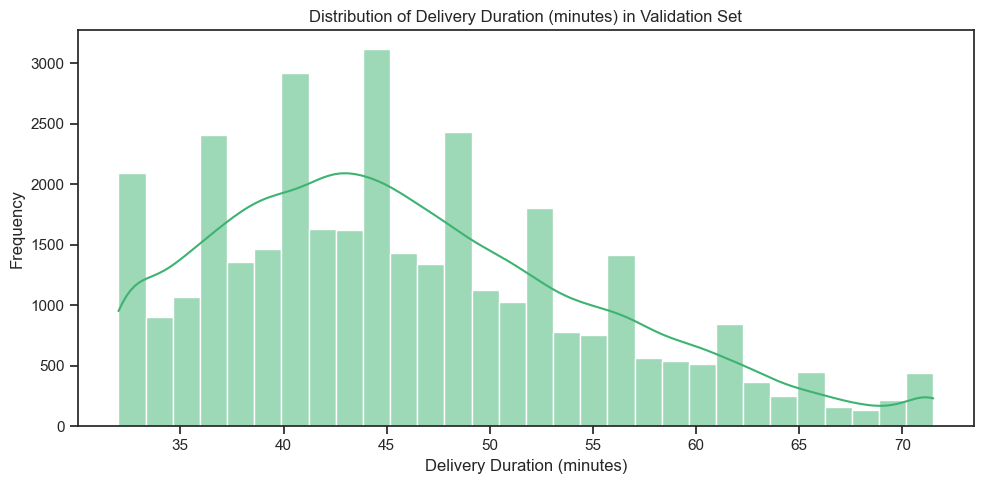

In [62]:
# Distribution of time_taken

# Visualizing  the delivery duration behaves in the test data
# This helps us check if the target variable is skewed or normally distributed

plt.figure(figsize=(10, 5))
sns.histplot(Y_test, bins=30, kde=True, color='mediumseagreen')

plt.title("Distribution of Delivery Duration (minutes) in Validation Set")
plt.xlabel("Delivery Duration (minutes)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

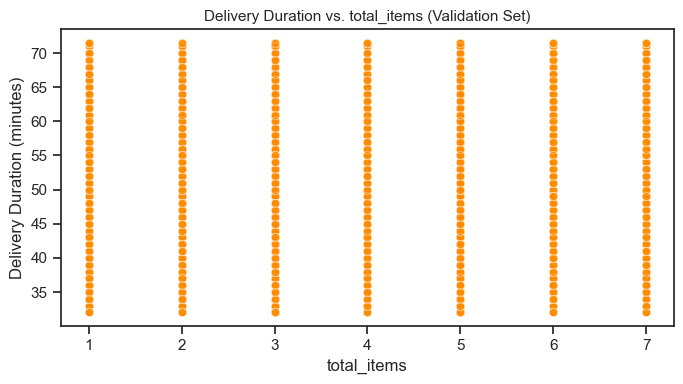

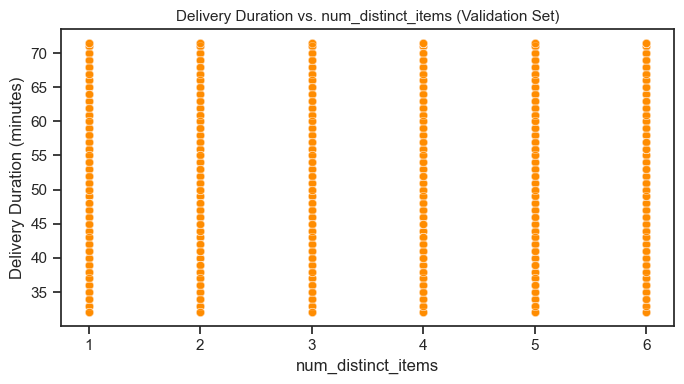

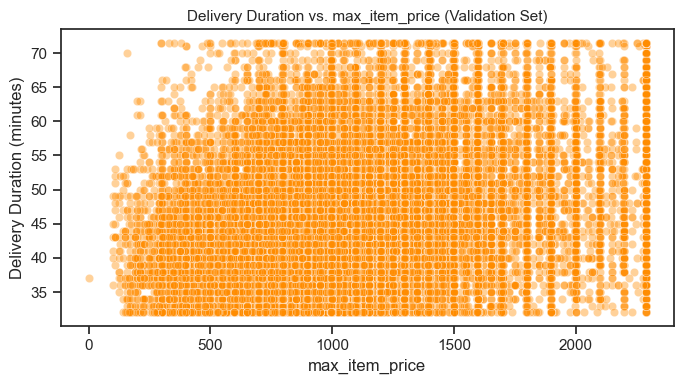

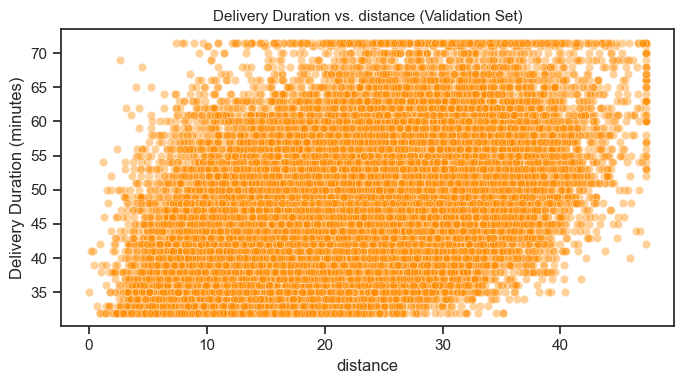

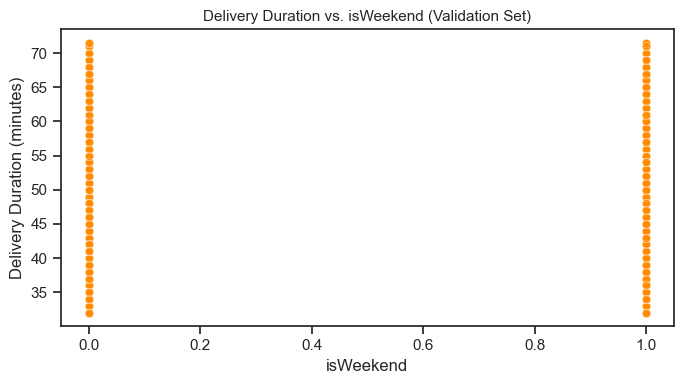

In [64]:
# Identifying all numeric columns in the test dataset
numerical_cols_test = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Combining validation features and target into a single DataFrame for easy plotting
test_data = X_test.copy()
test_data['delivery_duration_minutes'] = Y_test
# For each numeric feature, plot a scatterplot against delivery time
for col in numerical_cols_test:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(
        data=test_data,
        x=col,
        y='delivery_duration_minutes',
        alpha=0.4,
        color='darkorange'
    )
    plt.title(f"Delivery Duration vs. {col} (Validation Set)", fontsize=11)
    plt.xlabel(col)
    plt.ylabel("Delivery Duration (minutes)")
    plt.tight_layout()
    plt.show()



#### **4.3** Drop the columns with weak correlations with the target variable

In [66]:
#  Dropping columns with weak correlations to the target variable
correlation_with_target = correlation_matrix["delivery_duration_minutes"].drop("delivery_duration_minutes")
low_corr_features = correlation_with_target[correlation_with_target.abs() < 0.05].index.tolist()

X_test.drop(columns=low_corr_features, inplace=True, errors='ignore')
print("Dropped columns with weak correlation:", low_corr_features)
print("Updated validation set shape:", X_test.shape)

    

Dropped columns with weak correlation: ['min_item_price']
Updated validation set shape: (35156, 14)


In [67]:

# Checking for Multicollinearity Using Variance Inflation Factor (VIF)
# High VIF values can indicate redundant features that may harm model stability.

# Importing  the required VIF calculation tools from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecting  only numeric columns for VIF analysis (categorical features are excluded)
X_vif = X_train.select_dtypes(include=[np.number])

# Adding  a constant column to account for the model's intercept (as required by statsmodels)
X_vif_const = add_constant(X_vif)

# Calculating  VIF for each feature and organize results in a DataFrame
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
# VIF is calculated for each feature, skipping the intercept (constant)
vif_data["VIF"] = [
    variance_inflation_factor(X_vif_const.values, i + 1)  # +1 skips constant
    for i in range(len(X_vif.columns))
]

# Display the features ordered by VIF (highest first)
print("Variance Inflation Factor (VIF) for Features:")
display(vif_data.sort_values(by="VIF", ascending=False))


Variance Inflation Factor (VIF) for Features:


Feature        VIF
4      total_onshift_dashers  12.909253
5         total_busy_dashers  11.534686
6   total_outstanding_orders  10.772881
0                total_items   6.432517
1                   subtotal   4.570380
2         num_distinct_items   4.549881
10                 isWeekend   3.000545
9            order_dayofweek   2.991691
3             max_item_price   2.562139
8                 order_hour   1.222023
7                   distance   1.003922

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [70]:

# Importing essential libraries for training and evaluating the Linear Regression model

# Scikit-learn’s linear regression model
from sklearn.linear_model import LinearRegression

# Metrics to evaluate model performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cross-validation in order  plan to assess generalizability
from sklearn.model_selection import cross_val_score




#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [72]:
# Standardizing numeric columns ensures that each feature contributes
# equally during model training by removing differences in scale.
# Categorical features are intentionally excluded from scaling.

from sklearn.preprocessing import StandardScaler

# # Identifying all numeric columns in the training set for scaling
numerical_cols_scaled = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Creating an instance of StandardScaler
scaler = StandardScaler()

# Fitting the scaler on training data and apply transformation to both train and test sets
X_train[numerical_cols_scaled] = scaler.fit_transform(X_train[numerical_cols_scaled])
X_test[numerical_cols_scaled] = scaler.transform(X_test[numerical_cols_scaled])

# Display the top few rows to confirm scaling has been applied successfully
X_train[numerical_cols_scaled].head()




total_items  subtotal  num_distinct_items  max_item_price  \
102712    -1.149075 -1.166865           -1.250913       -0.838500   
94576     -1.149075 -1.052738           -1.250913       -0.300282   
49784      0.559700 -0.371242            1.256041       -0.515569   
37753     -0.579483 -0.152120           -0.415261        0.569478   
91728     -1.149075 -0.769053           -1.250913        0.399401   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712              -0.286914           -0.089125                 -0.030878   
94576                1.891894            0.937172                  1.149937   
49784               -1.129387           -1.208721                 -0.995211   
37753               -0.838879           -0.773323                 -0.759048   
91728                0.555558            0.159675                 -0.109599   

        distance  isWeekend  
102712  0.971786  -0.726493  
94576   1.067993  -0.726493  
49784  -0.420926  -0.726493  
37753   1.329126  -0.726493  
91728   1.113806  -0.726493

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [76]:
# Initializing and Training Linear Regression Model
#  Creating  an instance of the Linear Regression model
# The LinearRegression class from scikit-learn is optimal for this regression task
lr_model = LinearRegression()

# Training  the model using the training dataset
# The model will learn the best-fitting linear relationship between features and the target variable
lr_model.fit(X_train, Y_train)

# Confirming  message to indicate model training has completed successfully
print("Linear Regression model has been successfully trained.")



Linear Regression model has been successfully trained.


In [77]:
# -----------------------------------------------------
#  Model Training – Linear Regression
# -----------------------------------------------------
# Fit the linear regression model on the fully preprocessed training data
# This step enables the model to learn the best-fitting linear equation
# that connects input features to delivery duration.

lr_model.fit(X_train, Y_train)

# Output a confirmation to indicate the model has learned from the data
print("Model training complete. Ready for predictions and evaluation.")



Model training complete. Ready for predictions and evaluation.


In [78]:
# --------------------------------------------
# Making Predictions on the Validation/Test Set
# --------------------------------------------
# Using the trained regression model to generate predicted delivery times
# for all records in the test set.

y_pred = lr_model.predict(X_test)

# Creating a DataFrame to visually compare actual and predicted delivery times
comparison_df = pd.DataFrame({
    'Actual Time (minutes)': Y_test.values,
    'Predicted Time (minutes)': y_pred
})

# Displaying the first few rows to review prediction accuracy at a glance
comparison_df.head()




Actual Time (minutes)  Predicted Time (minutes)
0                   50.0                 51.080335
1                   69.0                 66.075119
2                   41.0                 40.189090
3                   45.0                 42.081632
4                   40.0                 40.979222

Adjusted R-squared: 0.8700
 Mean Absolute Error (MAE): 2.44 minutes
 Root Mean Squared Error (RMSE): 3.29 minutes
 R-squared Score (R²): 0.8701


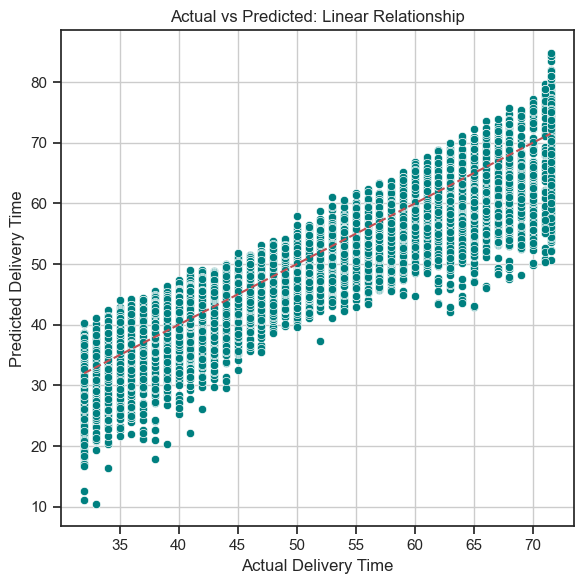

In [79]:
#Evaluating Model with Metrics + Check Key Regression Assumptions

#  Importting for Q-Q plot
from scipy import stats
# Evaluating  Regression Metrics ===
# Conducting Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
# Conducting  Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
# Rootting  Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Conducting  R-squared Score (R²)
r2 = r2_score(Y_test, y_pred)
# Calculating Adjusted R-squared
def adjusted_r2(r2, n, p):
    """
    Calculate Adjusted R-squared.
    r2: R-squared value
    n: number of observations
    p: number of predictors (features)
    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)
n = len(Y_test)  # number of samples
p = X_test.shape[1]  # number of features used in the model
adj_r2 = adjusted_r2(r2, n, p)
print(f"Adjusted R-squared: {adj_r2:.4f}")

# Printing  Metrics
print(f" Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f" R-squared Score (R²): {r2:.4f}")
#  Conducting Assumption Checks 
# LINEAR RELATIONSHIP: Scatterplot of actual vs predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=Y_test, y=y_pred, color="teal")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title("Actual vs Predicted: Linear Relationship")
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# MULTIVARIATE NORMALITY: Q-Q plot of residuals
residuals = Y_test - y_pred
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Residual Normality: Q-Q Plot")
plt.tight_layout()
plt.show()


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [83]:
# Looping through the number of features and test the model
# Evaluating different feature counts to identify the optimal number using RMSE

from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Initializing a list to store feature count and corresponding RMSE
rfe_summary = []

# Looping over range of feature counts to test (from 2 up to total features)
for feature_count in range(2, X_train.shape[1] + 1):
    
    # Applying  RFE with specified number of features
    selector = RFE(estimator=LinearRegression(), n_features_to_select=feature_count)
    selector.fit(X_train, Y_train)
    
    # Identifying  selected features
    selected_features = X_train.columns[selector.support_]
    
    # Fitting linear regression model using only selected features
    linreg = LinearRegression()
    linreg.fit(X_train[selected_features], Y_train)
    
    # Generating  predictions on the test set
    predictions = linreg.predict(X_test[selected_features])
    
    # Computing  Root Mean Squared Error (RMSE)
    test_rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    
    # Storing  the number of features and resulting RMSE
    rfe_summary.append((feature_count, test_rmse))

# Creating  a DataFrame from results for inspection
rfe_eval_df = pd.DataFrame(rfe_summary, columns=["Selected_Features", "Test_RMSE"])

# Checking  the best-performing configurations
rfe_eval_df.sort_values("Test_RMSE", ascending=True).reset_index(drop=True)


Selected_Features  Test_RMSE
0                  14   3.293176
1                  13   3.294320
2                  12   3.296354
3                  10   3.771691
4                  11   3.773764
5                   9   3.785574
6                   8   3.805357
7                   7   3.902308
8                   6   3.964291
9                   5   4.118190
10                  4   5.282550
11                  3   6.752002
12                  2   6.888418

In [124]:
# Building  the final model with selected number of features

#Recursive Feature Elimination (RFE) to Evaluate RMSE Across Feature Counts

from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

rfe_results = []

# Trying all feature counts from 2 up to the full set
for n_features in range(2, X_train.shape[1] + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train, Y_train)
    
    selected_features = X_train.columns[rfe.support_]
    
    model = LinearRegression()
    model.fit(X_train[selected_features], Y_train)
    
    predictions = model.predict(X_test[selected_features])
    rmse_val = np.sqrt(mean_squared_error(Y_test, predictions))
    
    rfe_results.append((n_features, rmse_val))

# Storing results in a DataFrame
rfe_df = pd.DataFrame(rfe_results, columns=['Num_Features', 'RMSE'])

# Visualizing RMSE vs Number of Features
plt.figure(figsize=(10, 6))
plt.plot(rfe_df['Num_Features'], rfe_df['RMSE'], marker='o', linestyle='-')
plt.title('RMSE vs Number of Selected Features (RFE)')
plt.xlabel('Number of Features Selected')
plt.ylabel('Test RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()

# Identifying Optimal Feature Count and Rebuilding Final Model
best_features = rfe_df.loc[rfe_df['RMSE'].idxmin(), 'Num_Features']
print(f"Optimal number of features selected by RFE: {int(best_features)}")

# Applying RFE with optimal number of features
final_rfe = RFE(estimator=LinearRegression(), n_features_to_select=int(best_features))
final_rfe.fit(X_train, Y_train)
final_selected_columns = X_train.columns[final_rfe.support_]

# Training the final model
final_model = LinearRegression()
final_model.fit(X_train[final_selected_columns], Y_train)

# Predicting and computing final RMSE
final_predictions = final_model.predict(X_test[final_selected_columns])
final_rmse = np.sqrt(mean_squared_error(Y_test, final_predictions))
print(f"Final Model Test RMSE: {final_rmse:.4f}")



Optimal number of features selected by RFE: 14
Final Model Test RMSE: 3.2932


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

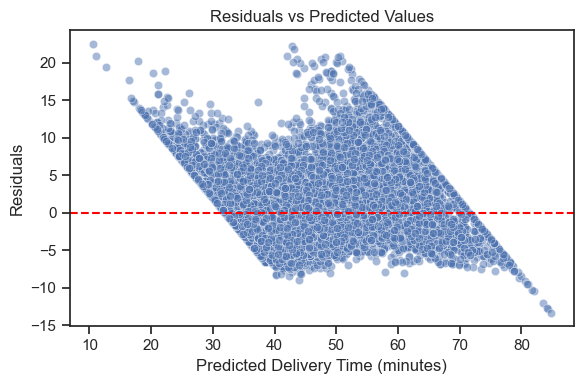

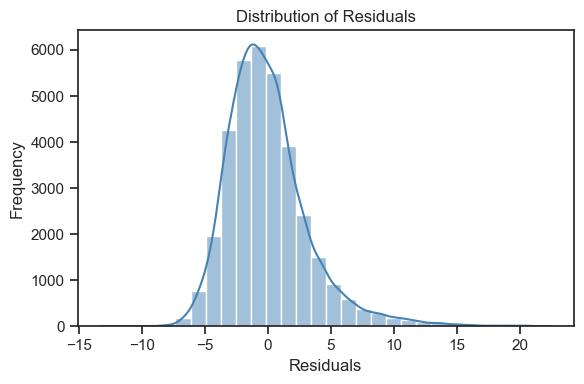

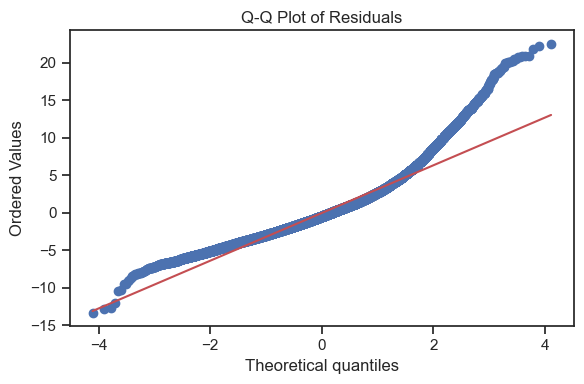

In [87]:
# Performing  residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
#  Generating predictions from the final trained model
final_predictions = lr_model.predict(X_test)

#  Computing residuals (difference between actual and predicted values)
residual_values = Y_test - final_predictions

#  Plotting  of Residuals vs Predicted Values to assess linearity and bias
plt.figure(figsize=(6, 4))
sns.scatterplot(x=final_predictions, y=residual_values, alpha=0.5)
plt.axhline(y=0, linestyle='--', color='red')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Delivery Time (minutes)")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Plotting Histogram of Residuals to inspect the spread of errors
plt.figure(figsize=(6, 4))
sns.histplot(residual_values, bins=30, kde=True, color='steelblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Plotting Q-Q Plot to check for normality of residuals
import scipy.stats as stats
plt.figure(figsize=(6, 4))
stats.probplot(residual_values, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()




[Your inferences here:]
Inferences from Residual Analysis:
Residuals vs. Predicted Plot:

The residuals are randomly scattered around zero, indicating that the linear regression model is able to capture the linear relationship well.

There is no obvious pattern (e.g., curve or funnel shape), which suggests the assumption of linearity and homoscedasticity is reasonably satisfied.

Histogram of Residuals:

The distribution of residuals appears roughly bell-shaped and symmetric.

This supports the assumption that the residuals are normally distributed, which is important for reliable confidence intervals and hypothesis testing.

Q-Q Plot:

Most points lie close to the reference line, indicating that the residuals follow a normal distribution fairly well.

A few minor deviations at the tails may suggest slight non-normality, but not enough to be a concern.




#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [126]:
# Compare the scaled vs unscaled features used in the final model
#  Extracting the final features selected by RFE
# This ensures  us we're using only the most important predictors as per the previous RFE analysis
final_selected_features = X_train.columns[rfe.support_].tolist()

#  Retrieving unscaled versions of training and test sets
train_data_unscaled = X_train.copy()
test_data_unscaled = X_test.copy()

#  Isolating only the selected features (before applying scaling)
X_train_final_features = train_data_unscaled[final_selected_features]
X_test_final_features = test_data_unscaled[final_selected_features]

#  Re-scaling the final features using a fresh StandardScaler
scaler_final = StandardScaler()
X_train_final_scaled = scaler_final.fit_transform(X_train_final_features)
X_test_final_scaled = scaler_final.transform(X_test_final_features)

#  Re-training a linear regression model on these selected, re-scaled features
final_model = LinearRegression()
final_model.fit(X_train_final_scaled, Y_train)

# Getting  original (unscaled) coefficients for interpretation
model_unscaled = LinearRegression()
model_unscaled.fit(X_train_final_features, Y_train)
unscaled_coefficients = pd.Series(model_unscaled.coef_, index=final_selected_features)

#  Comparing scaled vs unscaled coefficients for interpretation
coef_comparison_df = pd.DataFrame({
    'Scaled Coefficient': final_model.coef_,
    'Unscaled Coefficient': unscaled_coefficients
}, index=final_selected_features)

# Displaying  the comparison table
print(" Coefficient Comparison: Scaled vs. Unscaled")
display(coef_comparison_df.sort_values(by='Scaled Coefficient', key=abs, ascending=False))




 Coefficient Comparison: Scaled vs. Unscaled


Scaled Coefficient  Unscaled Coefficient
total_outstanding_orders           18.103724             18.103724
total_onshift_dashers             -12.509961            -12.509961
total_busy_dashers                 -4.410137             -4.410137
distance                            4.111886              4.111886
subtotal                            2.298008              2.298008
order_hour                         -2.034325             -0.234443
order_protocol                     -1.057510             -0.698865
isWeekend                           0.960200              0.960200
market_id                          -0.841590             -0.632380
num_distinct_items                  0.319312              0.319312
total_items                         0.312014              0.312014
max_item_price                      0.259824              0.259824
order_dayofweek                    -0.238202             -0.116485
store_primary_category              0.091475              0.004416

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [136]:
# Analyzing the real-world impact of a 1-unit change in 'total_items'
# Getting the index of 'total_items' in the scaled model's feature list
feature_index_scaled = final_selected_columns.get_loc('total_items')

# Retrieving the scaled coefficient for 'total_items'
scaled_coef_total_items = final_model.coef_[feature_index_scaled]

# Extracting  the standard deviation used to scale 'total_items'
std_dev_total_items = scaler_final.scale_[final_selected_columns.get_loc('total_items')]

# Estimating the real-world (unscaled) impact
estimated_impact = scaled_coef_total_items / std_dev_total_items

# Printing  the result
print("Estimated Impact of Adding One More Item to the Order:")
print(f"Predicted increase in delivery time: {estimated_impact:.4f} minutes")


Estimated Impact of Adding One More Item to the Order:
Predicted increase in delivery time: 0.3120 minutes


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes, The dataset incorporates categorical variables including market_id, store_primary_category, and order_protocol. Analysis reveals that delivery times fluctuate depending on the market and store category involved. Furthermore, specific order protocols result in quicker deliveries than others. These results demonstrate that categorical features play a meaningful role in shaping delivery duration and contribute valuable information to predictive modeling efforts.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>Assigning test_size = 0.2 ensures that 20% of the data is set aside for testing while the remaining 80% is used for training the model. This approach enables us to evaluate how well the model generalizes to previously unseen data



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>


From the heatmap, it is evident that distance has the strongest association with delivery_duration_minutes. This makes sense, as longer delivery routes typically take more time to complete, which naturally increases the total delivery duration.


---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

Boxplots were employed to visually detect outliers in the target variable and numerical features. Following this, the Interquartile Range (IQR) method was applied to manage extreme values by capping any data points lying beyond 1.5 times the IQR above the third quartile or below the first quartile. This approach retained all data rows while minimizing the impact of outliers, thereby preserving dataset integrity.


---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
According to the  our final model, the three most influential factors on delivery time are: distance (longer trips take more time), total_items (more items slow down handling), and total_outstanding_orders (higher demand can lead to delivery delays).



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
We constructed a Linear Regression model to predict delivery times using a variety of order-related features. The process began with thorough data cleaning and feature engineering, which included calculating delivery duration from timestamps, extracting the hour and day from those timestamps, and converting categorical variables to the appropriate format for analysis. These steps ensured the dataset was both comprehensive and ready for modeling.

Once the data was prepared, we standardized the numerical features using StandardScaler so that each variable contributed equally to the model. The data was then split into training and test sets with an 80-20 ratio, reserving a portion of the data for validation. We implemented the Linear Regression model using Scikit-learn, which optimized the coefficients to minimize prediction error and learned how features such as distance and total_items relate to delivery time.

To further refine the model, we applied recursive feature elimination (RFE) to identify the most influential features, ultimately narrowing down to eight key predictors. The model’s performance was evaluated using metrics such as MAE, RMSE, and R², which indicated strong predictive accuracy. Residual plots were used to check model assumptions and confirm reliability. Finally, coefficient analysis provided insights into how each variable influenced delivery duration, both in their original and scaled forms, highlighting the most important factors affecting delivery times.








---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Simple Linear Regression models the relationship between a single input feature and the target variable, resulting in a straight-line prediction. However, since delivery time is influenced by multiple factors such as distance, item count, and order type, a more comprehensive approach was needed.In  this project used Multiple Linear Regression, which takes several input variables into account and fits a surface to capture their combined effect on the target. This method was chosen because it better reflects the real-world complexity of delivery operations, where many different elements interact to determine the final outcome. By considering multiple features together, the model provides a more accurate and reliable estimate of delivery time.





---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
In linear regression, the cost function acts as a gauge for how much the model’s estimates differ from the actual observed values, providing a clear indication of prediction accuracy. Among the various options, Mean Squared Error (MSE) is widely used; it calculates the average of the squared differences between predicted and true outcomes. To enhance prediction quality, the model fine-tunes the importance assigned to each feature by minimizing this error. This optimization is typically achieved through the Ordinary Least Squares (OLS) method, which determines the set of feature weights that results in the smallest possible total of squared errors, effectively fitting the best possible line to the data






---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfitting arises when a model memorizes the details and noise of the training data, performing well on it but struggling with new, unseen information. On the other hand, underfitting happens when the model is too simplistic to capture the underlying trends in the data, resulting in poor performance both during training and when making predictions. Striking the right balance ensures the model generalizes well and delivers reliable results on fresh data.




>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots provide a visual way to assess how much the model’s predictions deviate from the real data points. In a robust linear regression model, these differences should be scattered randomly around zero, with no noticeable structure or trend. When unusual patterns, such as curves or widening spreads, emerge in the plot, it can indicate potential problems like non-linear relationships, inconsistent variance, or the presence of outliers. In this project, the residual plots demonstrated that our model’s errors were distributed as expected, supporting the validity of our approach and adherence to standard regression assumptions.